In [1]:
# Import all required libraries 

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.externals import joblib

# Load data & read data using pandas

In [2]:
# Import avacado data files using pandas

df=pd.read_csv("F:/Pranjali/Data Science/Eval Project/Data Files/avocado.csv")

In [3]:
# Check dataframe's column wise data 

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Rename dataframe's columns as below

df.rename(columns={'Total Volume':'TotalVolume','4046':'PU_4046','4225':'PU_4225','4770':'PU_4770','Total Bags':'TotalBags','Small Bags':'SmallBags','Large Bags':'LargeBags','XLarge Bags':'XLargeBags'}, inplace=True)
print(df.columns)

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'TotalVolume', 'PU_4046',
       'PU_4225', 'PU_4770', 'TotalBags', 'SmallBags', 'LargeBags',
       'XLargeBags', 'type', 'year', 'region'],
      dtype='object')


In [5]:
df.head(1)

,Unnamed: 0,Date,AveragePrice,TotalVolume,PU_4046,PU_4225,PU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


In [6]:
# Checking for null values & data types of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   TotalVolume   18249 non-null  float64
 4   PU_4046       18249 non-null  float64
 5   PU_4225       18249 non-null  float64
 6   PU_4770       18249 non-null  float64
 7   TotalBags     18249 non-null  float64
 8   SmallBags     18249 non-null  float64
 9   LargeBags     18249 non-null  float64
 10  XLargeBags    18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [82]:
# Check distribution of categorical feature

df.describe(include=['O'])

,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2016-09-04,conventional,Detroit
freq,108,9126,338


Above count shows that 'conventional' avacado type were highly available in region Detroit on 4th Sept2016  

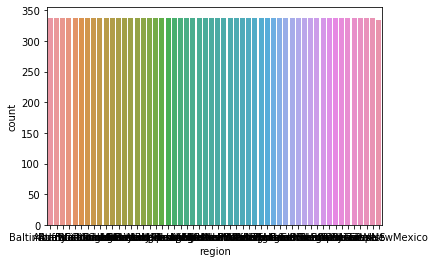

In [7]:
# Analysis of target value 'class' using plot to visualise % of  
sns.countplot(x='region', data=df);

# Statistical Data Analysis-

In [8]:
df.describe()

,Unnamed: 0,AveragePrice,TotalVolume,PU_4046,PU_4225,PU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [9]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,TotalVolume,PU_4046,PU_4225,PU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [10]:
# class distribution of target 
print(df.groupby('type').size())

type
conventional    9126
organic         9123
dtype: int64


In [11]:
# class distribution of target 
print(df.groupby('year').size())

year
2015    5615
2016    5616
2017    5722
2018    1296
dtype: int64


Above count shows that in year 2017 more avacado available 

In [12]:
# class distribution of target 
print(df.groupby('region').size())

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

Its shows all region having equal avacado availability except 'WestTexNewMexico'.       

# Convert all columns datatypes into interger using LabelEncoder

In [13]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['Date','AveragePrice','TotalVolume','PU_4046','PU_4225','PU_4770','TotalBags','SmallBags','LargeBags','XLargeBags','type','year','region']  # need to use columns_names for pandas & for numpy use range(n) instead

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

In [14]:
# Checking datatypes after using label encoder for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Unnamed: 0    18249 non-null  int64
 1   Date          18249 non-null  int32
 2   AveragePrice  18249 non-null  int64
 3   TotalVolume   18249 non-null  int64
 4   PU_4046       18249 non-null  int64
 5   PU_4225       18249 non-null  int64
 6   PU_4770       18249 non-null  int64
 7   TotalBags     18249 non-null  int64
 8   SmallBags     18249 non-null  int64
 9   LargeBags     18249 non-null  int64
 10  XLargeBags    18249 non-null  int64
 11  type          18249 non-null  int32
 12  year          18249 non-null  int64
 13  region        18249 non-null  int32
dtypes: int32(3), int64(11)
memory usage: 1.7 MB


In [15]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,TotalVolume,PU_4046,PU_4225,PU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,51,86,7931,4383,10872,1400,5780,5782,1264,0,0,0,0
1,1,50,88,7645,3616,10213,1570,6013,5972,1288,0,0,0,0


# Statistical Data Analysis -

In [16]:
df.shape

(18249, 14)

In [17]:
df.describe()

,Unnamed: 0,Date,AveragePrice,TotalVolume,PU_4046,PU_4225,PU_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.997096,93.595265,9114.688312,8601.745356,8984.864376,4029.833142,8982.184777,8263.606115,6261.255850,893.316894,0.499918,1.147899,26.495644
std,15.481045,48.787638,40.253995,5265.433348,5232.888735,5258.854866,3996.027809,5253.461654,5168.860788,4852.398211,1569.392283,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,42.000000,63.000000,4554.000000,4032.000000,4426.000000,0.000000,4414.000000,3651.000000,1479.000000,0.000000,0.000000,0.000000,13.000000
50%,24.000000,84.000000,90.000000,9113.000000,8579.000000,8979.000000,2993.000000,8973.000000,8199.000000,5969.000000,0.000000,0.000000,1.000000,26.000000
75%,38.000000,126.000000,119.000000,13675.000000,13139.000000,13540.000000,7508.000000,13534.000000,12758.000000,10520.000000,1270.000000,1.000000,2.000000,40.000000
max,52.000000,168.000000,258.000000,18236.000000,17701.000000,18102.000000,12070.000000,18096.000000,17320.000000,15081.000000,5587.000000,1.000000,3.000000,53.000000


# EDA - Analyse the data set stats using plots

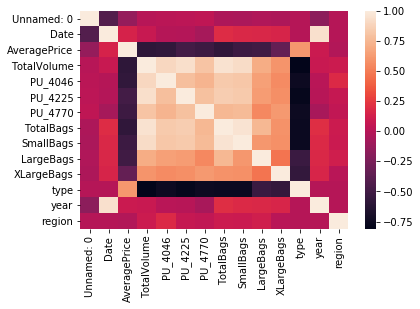

In [18]:
# checking correlation using heatmap
dfcor=df.corr()
sns.heatmap(dfcor)

Above correlation plot shows that column name 'TotalVolume','PU_4046','PU_4225','PU_4770','TotalBags','SmallBags','LargeBags','XLargeBags'
are correlated.

# Data Visualization - Unvariate plot / Multivariate Plots

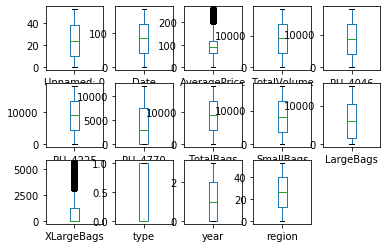

In [19]:
# Data Visualization - Unvariate plot (box and whisker plots)
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

Above plots shows no outliers there in feature dataset. 

In [20]:
# Checking for skewness for each of the column
df.skew()

Unnamed: 0      0.108334
Date            0.000117
AveragePrice    0.577300
TotalVolume     0.000753
PU_4046         0.016272
PU_4225         0.003850
PU_4770         0.510735
TotalBags       0.007023
SmallBags       0.048568
LargeBags       0.188522
XLargeBags      1.610157
type            0.000329
year            0.215339
region          0.000030
dtype: float64

Above results shows skewness is there only in XLargeBags column & no skewness in other columns,hence need to consider all columns in feature list.    

In [21]:
# Preparing X & y 

import pandas as pd
X = df[['AveragePrice','TotalVolume','PU_4046','PU_4225','PU_4770','TotalBags','SmallBags','LargeBags','XLargeBags']]
y = df.region        # y is a vector, hence we use dot to access 'label'

In [22]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(18249, 9)


In [23]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(18249,)


In [24]:
# Splitting X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
# train a logistic regression model on the training set as target(region) is having categorical values.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()        # instantiate model
logreg.fit(X_train, y_train)         # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# make class predictions for the testing set
from sklearn import metrics

y_pred_class = logreg.predict(X_test)

# Classification accuracy: percentage of correct predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.27671232876712326


In [27]:
# Load libraries

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
# Grid Search for Algorithm Tuning

import numpy as np
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# load the diabetes datasets
dataset = datasets.load_diabetes()
# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(dataset.data, dataset.target)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.48232313841634855
0.0001


In [29]:
# Randomized Search for Algorithm Tuning

import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
# load the diabetes datasets
dataset = datasets.load_diabetes()
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(dataset.data, dataset.target)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002BDAE902BC8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.48091804477655664
0.034406762246746436


In [40]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:    
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.254421 (0.008443)
LDA: 0.273679 (0.008702)
KNN: 0.818614 (0.010950)
CART: 0.775480 (0.009645)
NB: 0.051041 (0.003841)
SVM: 0.019806 (0.000356)


In [34]:
# Import required libraries 

import seaborn as sb
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# From sklearn matrics import accuracy_score,confusion_matrix,classification_reports
# Cross validation Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [35]:
# scoring parameters for classification
# scoring =[accuracy,f1,f1_micro,f1_macro,roc_auc]
# scoring =[r2,neg_mean_squared_error,explained_variance]

sv=SVC()
score=cross_val_score(sv,X,y,cv=20,scoring='accuracy')
print('accuracy score=',score)
print ('mean scores',score.mean)
print('std',score.std())
y_pred = cross_val_predict(sv,X,y,cv=20)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score= [0.73274918 0.77765608 0.69769989 0.68674699 0.70098576 0.70536692
 0.61336254 0.72946331 0.76889376 0.59210526 0.43201754 0.49780702
 0.37828947 0.58114035 0.57565789 0.55153509 0.48245614 0.56578947
 0.62061404 0.53399123]
mean scores <built-in method mean of numpy.ndarray object at 0x000002BDAE9158A0>
std 0.10987456173841421
Y prediction values
[ 0  0  0 ... 44  2  2]


0.6112663707600416

In [36]:
# Decision Tree Classifier (criterion='gini')
# Decision Tree Classifier (criterion='entropy')
# gini and entropy

dtc=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dtc,X,y,cv=5,scoring='f1_macro')

print('f1_score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(dtc, X, y, cv=30)

print('Y prediction values')
print(y_pred)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

f1_score: [0.46361123 0.66699612 0.61257593 0.52255515 0.39591785]
mean score: 0.5323312559711353
stn deviation: 0.0979800628503577
Y prediction values
[ 0  0  0 ...  7 53 48]


0.7010247136829415

In [37]:
knn=KNeighborsClassifier()
score=cross_val_score(knn,X,y,cv=5,scoring='accuracy')

print('accuracy score:',score)
print('mean score:',score.mean())
print('stn deviation:',score.std())

y_pred = cross_val_predict(knn, X, y, cv=25)

print('Y prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(y, y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy score: [0.59506849 0.70684932 0.66575342 0.54356164 0.39380652]
mean score: 0.5810078798094429
stn deviation: 0.10923565706866394
Y prediction values
[ 0 49  0 ... 53 53 53]
y_pred.shape (18249,)


0.7382870294262699

In [38]:
from sklearn.externals import joblib 
from sklearn.neighbors import KNeighborsClassifier

joblib_file = "joblib_knn.pkl"             # Save to file in the current working directory
joblib.dump(knn, joblib_file)
joblib_knn = joblib.load(joblib_file)      # Load from file

score=cross_val_score(knn,X,y,cv=25,scoring='accuracy')

print(score)

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

[0.83972603 0.83013699 0.84657534 0.84520548 0.73424658 0.77534247
 0.83561644 0.84109589 0.7260274  0.8369863  0.85753425 0.76986301
 0.66712329 0.68630137 0.71232877 0.62739726 0.64657534 0.6739726
 0.63972603 0.65753425 0.72328767 0.68493151 0.64383562 0.67808219
 0.6776406 ]


0.7382870294262699

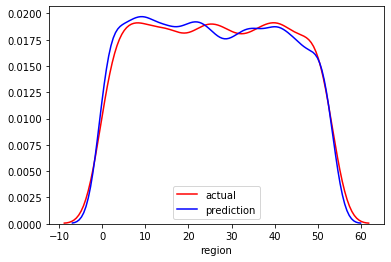

In [39]:
# Visualization of predictions
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

Conclusion-Avocado dataset gives best score for KNN model as 81% with 73% accuracy.
This model shows that 'conventional' avacado type were highly available in Detroit region on 4th Sept2016